#Data Visualization

In [1]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from scipy.stats import spearmanr

In [0]:
# Navigate to folder containing project
os.chdir("drive/My Drive/COMP 551 Project 4/")

#Preprocessing

In [0]:
# Get a list of files 
handmade_cnn = glob.glob("Results/HandmadeCNN/*.csv")
handmade_cnn_momentum = glob.glob("Results/HandmadeCNNMomentum/*.csv")
resnet_cifar10_list = glob.glob("Results/ResNetCIFAR10/*epochs*.csv")
resnet_cifar100_list = glob.glob("Results/ResNetCIFAR100/*epochs*.csv")
vgg19_cifar10_list_epochs200 = glob.glob("Results/VGG19CIFAR10EPOCHS200/*.txt")
vgg19_cifar100_list_epochs200 = glob.glob("Results/VGG19CIFAR100EPOCHS200/*.txt")
xception_list =  glob.glob("Results/XceptionCIFAR10/*.csv")

In [0]:
def clean_text_file(path):
  '''
  Method that receives as input a path to a txt file which contains training data.
  Returns a list containing the following values:
  - max validation accuracy
  - learning rate 
  - batch size
  '''  
  # Use ReGex to find batch size in path 
  data = pd.read_csv(path, sep=",")
  bs = data["Batch Size"].values[0]
  
  # Use ReGex to find learning rate in path 
  lr = float(re.search("lr((\d)+\.(\d)+)",path).group(1))

  # Get max val_acc from training data 
  max_acc = data["Valid Acc."].max()/100
  
  return [bs, lr, max_acc]  

In [0]:
def clean_log(path):
  '''
  Method that receives as input a path to a csv which contains training data.
  Returns a list containing the following values:
  - max validation accuracy
  - learning rate 
  - batch size
  '''  
  df = pd.read_csv(path)

  # Use ReGex to find batch size in path 
  bs = float(re.search("batch_size([\d]+)",path).group(1))
  
  # Use ReGex to find learning rate in path 
  lr = float(re.search("learning_rate((\d)+\.(\d)+)",path).group(1))

  # Get max val_acc from training data
  max_acc = 0
  if 'val_acc' in df.columns:
    max_acc = df.val_acc.max()
  else:
    max_acc = df.val_accuracy.max()
  
  return [bs, lr, max_acc]  

In [0]:
def scc_and_pvalue(x,y):  
  return spearmanr(x.to_numpy(), y.to_numpy())

In [222]:
# Handmade CNN
# xception
ff= momentum_cnn.loc[momentum_cnn.batch_size==64]
ff
# momentum_cnn

scc_and_pvalue(ff.learning_rate, ff.val_acc)

SpearmanrResult(correlation=-0.9757575757575757, pvalue=1.4675461874042197e-06)

In [0]:
# Create DataFrames
resnet50_cifar10 = pd.DataFrame(data=[clean_log(_) for _ in resnet_cifar10_list], columns=["batch_size", "learning_rate", "val_acc"])
resnet50_cifar100 = pd.DataFrame(data=[clean_log(_) for _ in resnet_cifar100_list], columns=["batch_size", "learning_rate", "val_acc"])
cnn = pd.DataFrame(data=[clean_log(_) for _ in handmade_cnn], columns=["batch_size", "learning_rate", "val_acc"])
momentum_cnn = pd.DataFrame(data=[clean_log(_) for _ in handmade_cnn_momentum], columns=["batch_size", "learning_rate", "val_acc"])
vgg19_cifar10_epochs200 = pd.DataFrame(data=[clean_text_file(_) for _ in vgg19_cifar10_list_epochs200], columns=["batch_size", "learning_rate", "val_acc"])
vgg19_cifar100_epochs200 = pd.DataFrame(data=[clean_text_file(_) for _ in vgg19_cifar100_list_epochs200], columns=["batch_size", "learning_rate", "val_acc"])
xception = pd.DataFrame(data=[clean_log(_) for _ in xception_list], columns=["batch_size", "learning_rate", "val_acc"])

In [0]:
# Add values for each dataframe 
# resnet50_cifar10 = resnet50_cifar10.append(pd.DataFrame([[16.0,0.010,0.801]], columns=["batch_size", "learning_rate", "val_acc"]), ignore_index=True)
# resnet50_cifar100 = resnet50_cifar100.append(pd.DataFrame([[16.0,0.010,0.5121],[32.0,0.010,0.5281]], columns=["batch_size", "learning_rate", "val_acc"]),ignore_index=True)
# vgg19_cifar10 = vgg19_cifar10.append(pd.DataFrame([[16.0,0.010,0.8164],[32.0,0.010,0.7990]], columns=["batch_size", "learning_rate", "val_acc"]), ignore_index=True)
# vgg19_cifar10_epochs200.append(pd.DataFrame([[224.0,0.10, 0.887],[190, 0.10, 0.891], [160,0.10, 0.893],[32.0,0.1, 0.89], [96.0,0.1,0.882]], columns=["batch_size", "learning_rate", "val_acc"]), ignore_index=True)
# vgg19_cifar100_epochs200.append(pd.DataFrame([[32.0,0.1,0.45],[96.0,0.10,0.516], [128.0,0.10, 0.5161]], columns=["batch_size", "learning_rate", "val_acc"]), ignore_index=True)

In [0]:
# Sort values by learning rate, then batch size  
vgg19_cifar10_epochs200.sort_values(by=["learning_rate", "batch_size"], axis=0, ascending=True, inplace=True)
vgg19_cifar100_epochs200.sort_values(by=["learning_rate", "batch_size"], axis=0, ascending=True, inplace=True)
resnet50_cifar10.sort_values(by=["learning_rate", "batch_size"], axis=0, ascending=True, inplace=True)
resnet50_cifar100.sort_values(by=["learning_rate", "batch_size"], axis=0, ascending=True, inplace=True)
xception.sort_values(by=["learning_rate", "batch_size"], axis=0, ascending=True, inplace=True)
cnn.sort_values(by=["learning_rate", "batch_size"], axis=0, ascending=True, inplace=True)
momentum_cnn.sort_values(by=["learning_rate", "batch_size"], axis=0, ascending=True, inplace=True)

#Plotting Functions


In [0]:
def plot_acc_vs_bs(df, folder):
  '''
  Method that takes a dataframe as input and generates plots of batch size against test accuracy for each learning rate in the plots folder
  '''
  for i in df.groupby("learning_rate"):
    plt.plot(i[1].batch_size, i[1].val_acc, color="green", linestyle="--")
    plt.ylabel("Accuracy on test set")
    plt.xlabel("Batch size")
    plt.title("Evolution of test accuracy on batch size for learning rate of {}".format(i[0]))
    plt.legend()
    plt.savefig("Plots/200epochs/{}/val_acc_batch_size_lr{}.png".format(folder,i[0]))
    plt.show()

In [0]:
def scatter_plot(df, folder, title):
  ratio = df.batch_size/df.learning_rate
  plt.scatter(ratio, df.val_acc, color="green", linestyle="--")
  plt.ylabel("Test Accuracy")
  plt.xlabel("Ratio of Batch Size to Learning Rate")
  plt.title(title)
  plt.legend()
  plt.savefig("Plots/200epochs/{}/scatter_plot.png".format(folder))
  plt.show()

In [0]:
def plot_acc_vs_lr(df, folder):
  '''
  Method that takes a dataframe as input and generates plots of test accuracy against learning rate for each batch size.
  '''
  for i in df.groupby("batch_size"):
    plt.plot(i[1].learning_rate, i[1].val_acc, color="green", linestyle="--")
    plt.ylabel("Accuracy on test set")
    plt.xlabel("Learning rate")
    plt.title("Evolution of test accuracy on learning rate for batch size of {}".format(i[0]))
    plt.legend()
    plt.savefig("Plots/200epochs/{}/val_acc_learning_rate_bs{}.png".format(folder,i[0]))
    plt.show()

#Investigate Xception on CIFAR-10

In [79]:
xception

,batch_size,learning_rate,val_acc
0,16.0,0.010,0.8486
15,32.0,0.010,0.8181
16,32.0,0.020,0.8361
1,16.0,0.030,0.8515
17,32.0,0.030,0.8453
2,16.0,0.040,0.8602
9,32.0,0.040,0.8500
3,16.0,0.050,0.8419
4,32.0,0.050,0.8466
11,192.0,0.050,0.8076


No handles with labels found to put in legend.


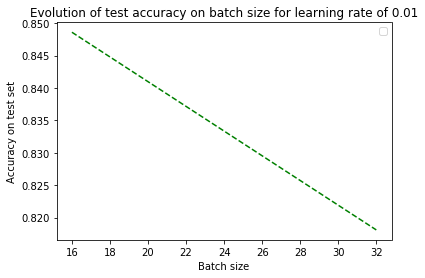

No handles with labels found to put in legend.


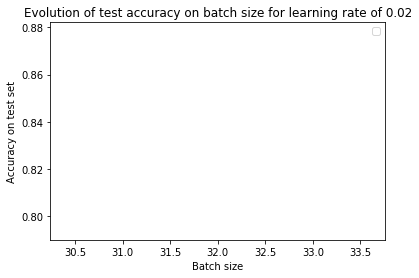

No handles with labels found to put in legend.


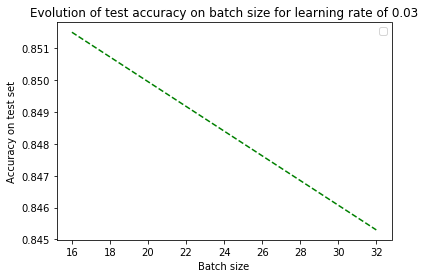

No handles with labels found to put in legend.


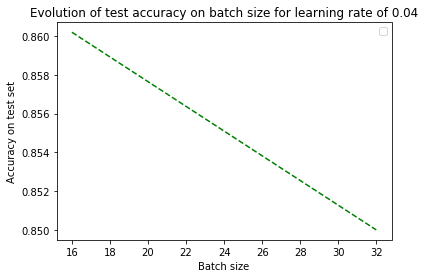

No handles with labels found to put in legend.


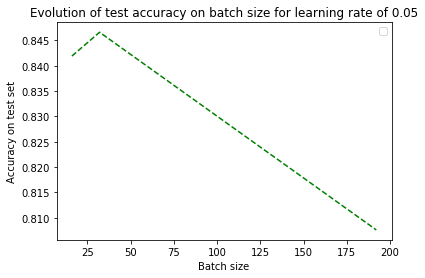

No handles with labels found to put in legend.


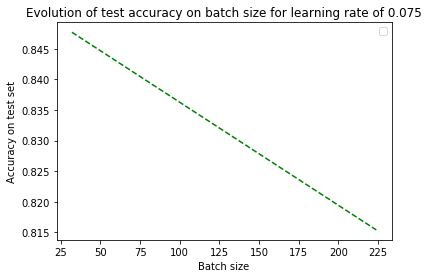

No handles with labels found to put in legend.


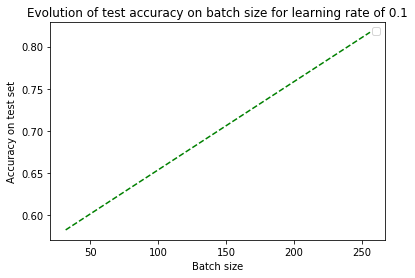

No handles with labels found to put in legend.


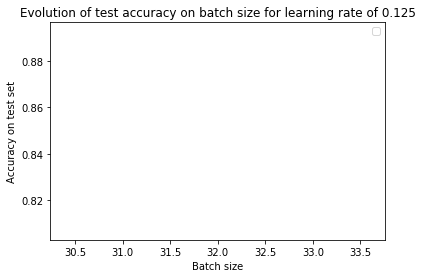

No handles with labels found to put in legend.


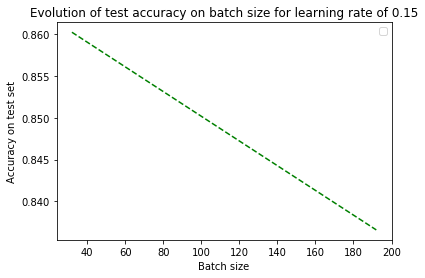

No handles with labels found to put in legend.


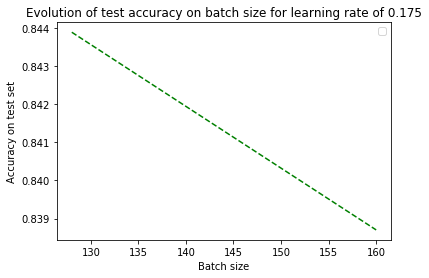

No handles with labels found to put in legend.


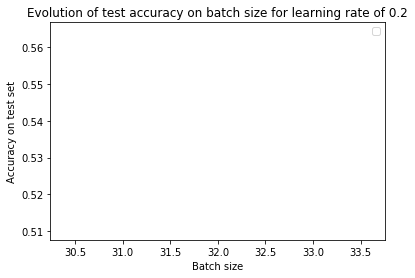

In [80]:
plot_acc_vs_bs(xception, "Xception")

No handles with labels found to put in legend.


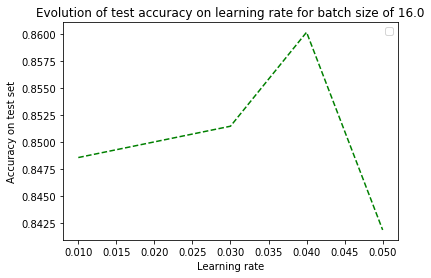

No handles with labels found to put in legend.


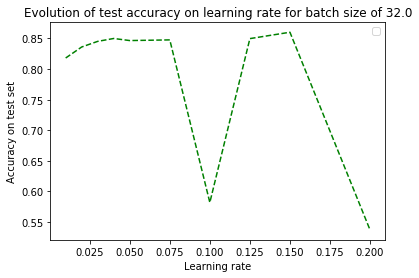

No handles with labels found to put in legend.


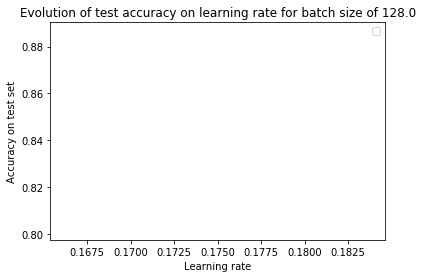

No handles with labels found to put in legend.


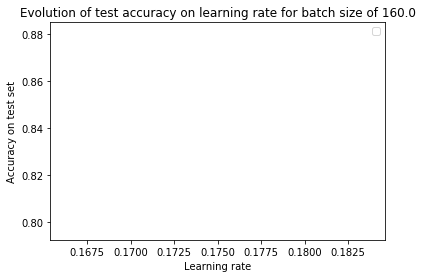

No handles with labels found to put in legend.


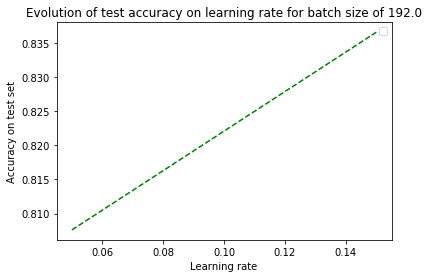

No handles with labels found to put in legend.


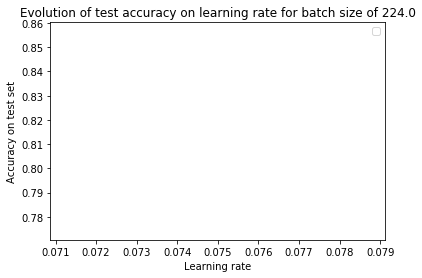

No handles with labels found to put in legend.


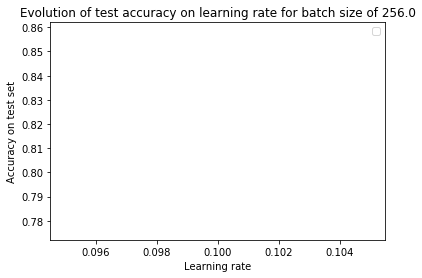

In [81]:
# Plot test set accuracy w.r.t. learning rate
plot_acc_vs_lr(xception, "Xception")

No handles with labels found to put in legend.


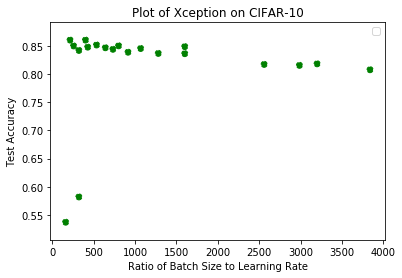

In [82]:
scatter_plot(xception, "Xception", "Plot of Xception on CIFAR-10")

#Investigate Handmade CNN on CIFAR-10

In [100]:
cnn.head(10)

,batch_size,learning_rate,val_acc
76,32.0,0.01,0.5703
62,96.0,0.01,0.4889
55,128.0,0.01,0.4748
25,160.0,0.01,0.5780
24,192.0,0.01,0.5163
2,224.0,0.01,0.5175
23,256.0,0.01,0.4708
15,320.0,0.01,0.4401
45,32.0,0.02,0.6699
67,96.0,0.02,0.5215


No handles with labels found to put in legend.


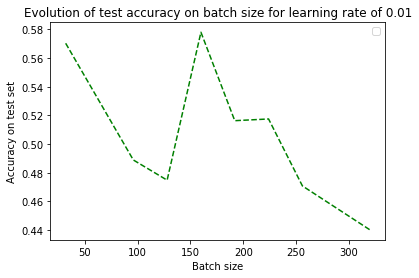

No handles with labels found to put in legend.


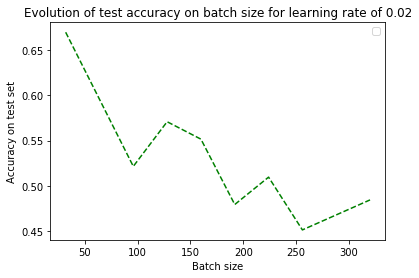

No handles with labels found to put in legend.


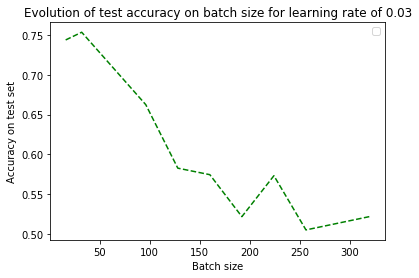

No handles with labels found to put in legend.


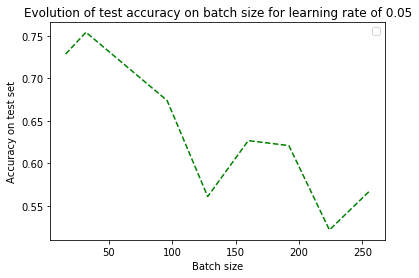

No handles with labels found to put in legend.


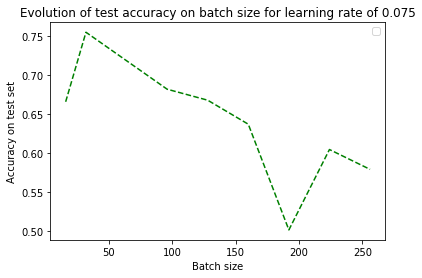

No handles with labels found to put in legend.


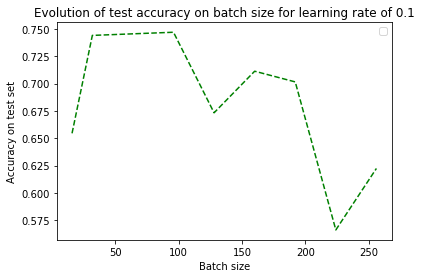

No handles with labels found to put in legend.


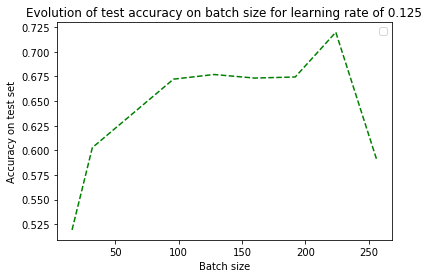

No handles with labels found to put in legend.


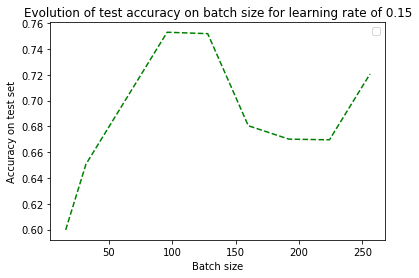

No handles with labels found to put in legend.


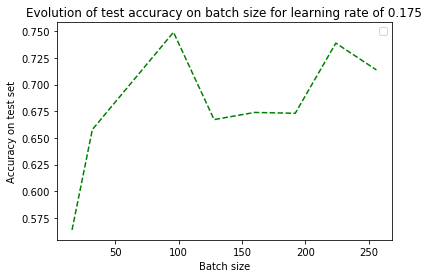

No handles with labels found to put in legend.


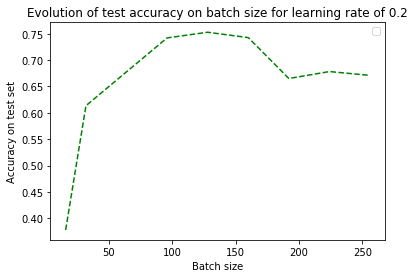

In [90]:
plot_acc_vs_bs(cnn, "HandmadeCNN")

No handles with labels found to put in legend.


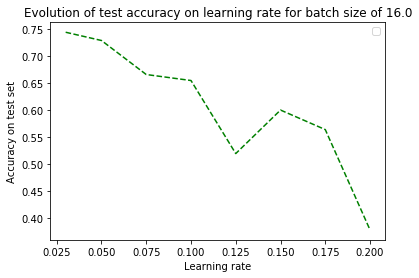

No handles with labels found to put in legend.


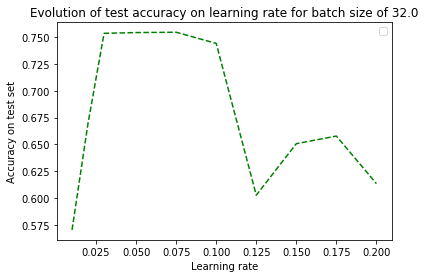

No handles with labels found to put in legend.


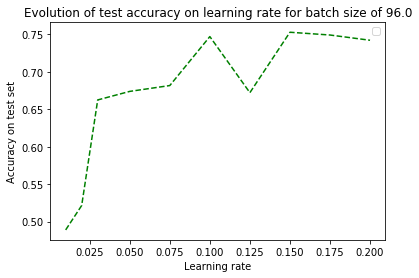

No handles with labels found to put in legend.


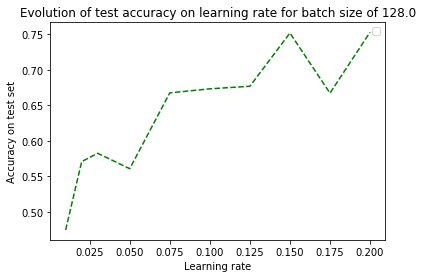

No handles with labels found to put in legend.


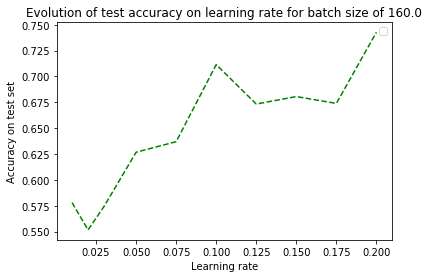

No handles with labels found to put in legend.


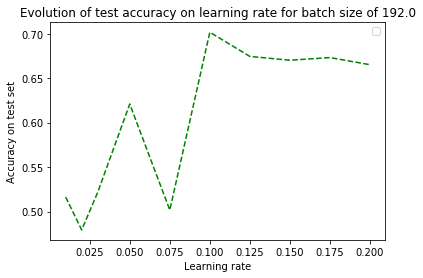

No handles with labels found to put in legend.


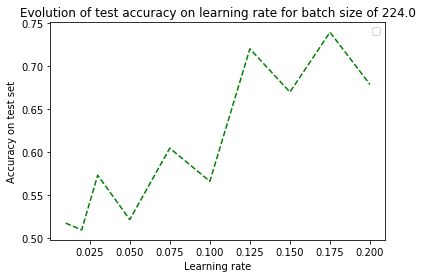

No handles with labels found to put in legend.


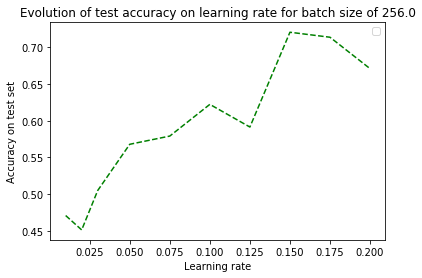

No handles with labels found to put in legend.


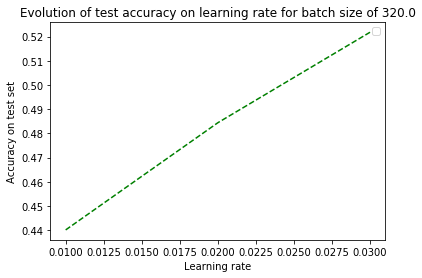

In [91]:
# Plot test set accuracy w.r.t. learning rate
plot_acc_vs_lr(cnn, "HandmadeCNN")

No handles with labels found to put in legend.


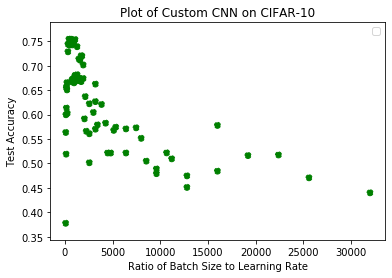

In [92]:
scatter_plot(cnn, "HandmadeCNN", "Plot of Custom CNN on CIFAR-10")

#Investigate Handmade CNN on Momentum on CIFAR-10

In [93]:
momentum_cnn

,batch_size,learning_rate,val_acc
7,16.0,0.010,0.7273
6,32.0,0.010,0.7360
8,64.0,0.010,0.7245
0,96.0,0.010,0.7208
1,128.0,0.010,0.7190
2,160.0,0.010,0.7248
3,192.0,0.010,0.7215
5,224.0,0.010,0.7170
9,256.0,0.010,0.7193
4,320.0,0.010,0.7127


No handles with labels found to put in legend.


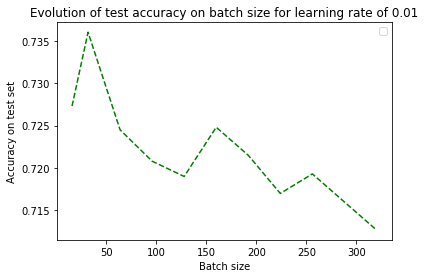

No handles with labels found to put in legend.


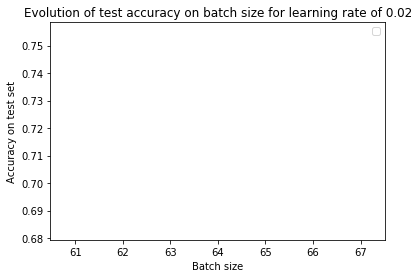

No handles with labels found to put in legend.


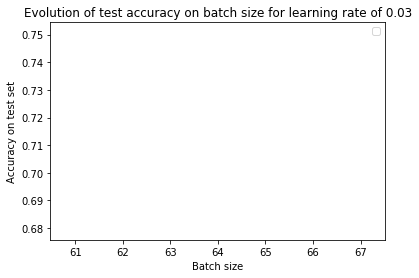

No handles with labels found to put in legend.


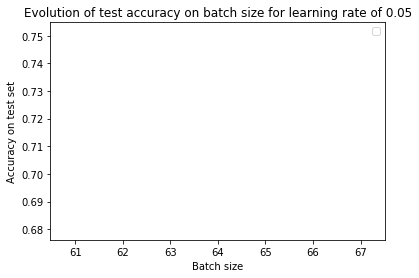

No handles with labels found to put in legend.


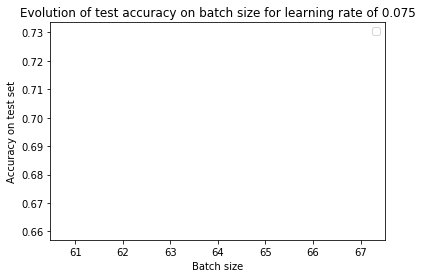

No handles with labels found to put in legend.


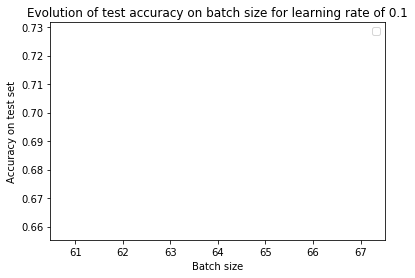

No handles with labels found to put in legend.


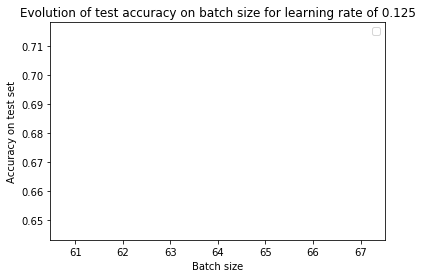

No handles with labels found to put in legend.


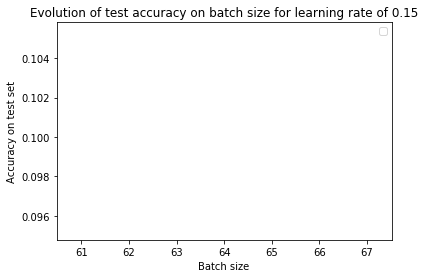

No handles with labels found to put in legend.


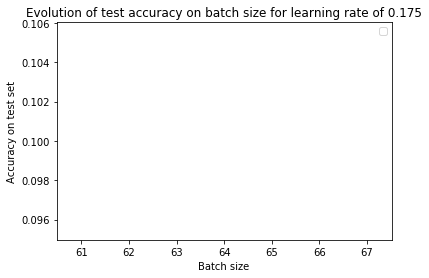

No handles with labels found to put in legend.


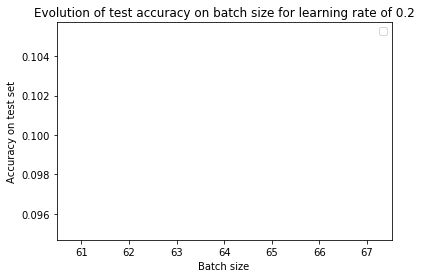

In [223]:
# Investigate effect of batch size: sort by batch size then by learning rate
plot_acc_vs_bs(momentum_cnn, "HandmadeCNNMomentum")

No handles with labels found to put in legend.


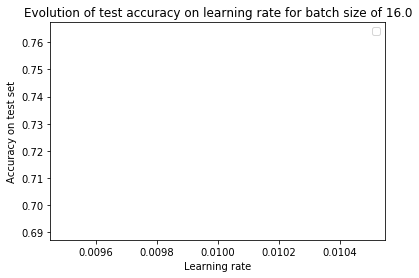

No handles with labels found to put in legend.


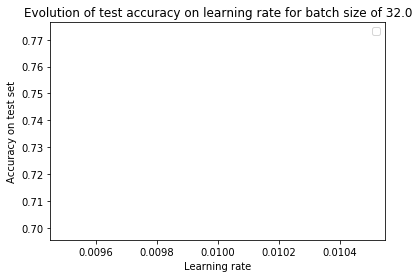

No handles with labels found to put in legend.


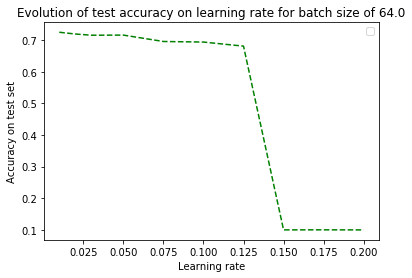

No handles with labels found to put in legend.


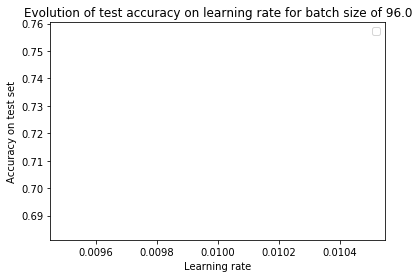

No handles with labels found to put in legend.


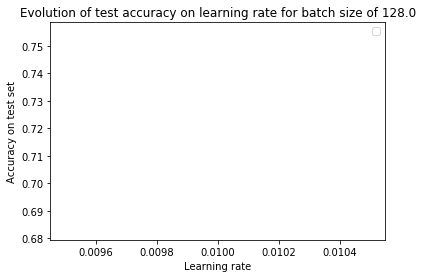

No handles with labels found to put in legend.


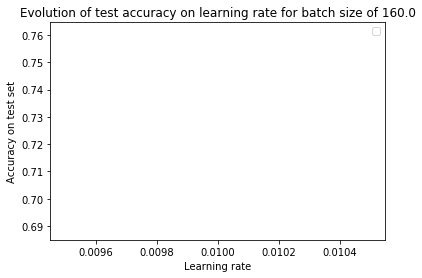

No handles with labels found to put in legend.


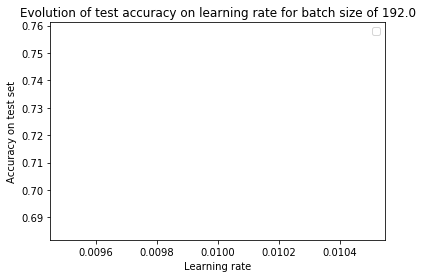

No handles with labels found to put in legend.


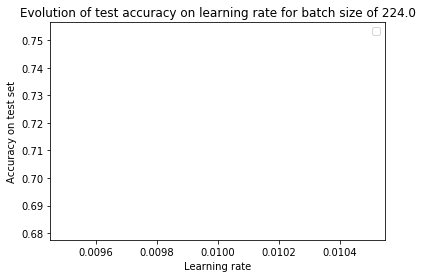

No handles with labels found to put in legend.


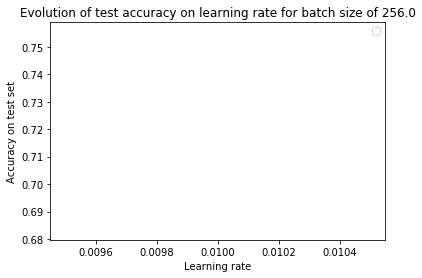

No handles with labels found to put in legend.


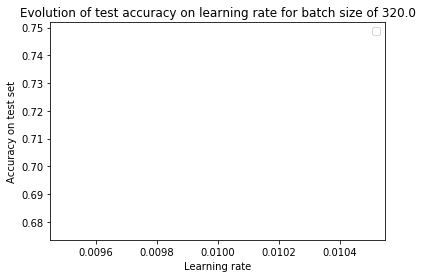

In [224]:
# Plot test set accuracy w.r.t. learning rate
plot_acc_vs_lr(momentum_cnn, "HandmadeCNNMomentum")

No handles with labels found to put in legend.


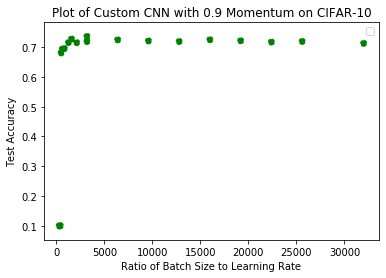

In [103]:
scatter_plot(momentum_cnn, "HandmadeCNNMomentum", "Plot of Custom CNN with 0.9 Momentum on CIFAR-10")

#Investigate ResNet50 on CIFAR10

In [122]:
# Investigate ResNet50 on CIFAR10
resnet50_cifar10.reset_index(drop=True,inplace=True)
print(resnet50_cifar10)

    batch_size  learning_rate  val_acc
0         64.0          0.010   0.8072
1         64.0          0.020   0.8053
2         64.0          0.030   0.7931
3         16.0          0.100   0.6054
4         64.0          0.050   0.7903
5         64.0          0.075   0.7512
6         32.0          0.100   0.6472
7         96.0          0.100   0.7723
8        128.0          0.100   0.7650
9        160.0          0.100   0.7558
10        64.0          0.100   0.7638
11       192.0          0.100   0.7857
12       224.0          0.100   0.7859
13       256.0          0.100   0.7876
14        64.0          0.125   0.7656
15       320.0          0.100   0.7899
16        64.0          0.150   0.7299
17        32.0          0.010   0.8017
18        16.0          0.200   0.7225
19       224.0          0.010   0.7701
20       192.0          0.010   0.7424
21       256.0          0.010   0.7655
22       320.0          0.010   0.7611
23        16.0          0.030   0.7889


In [0]:
# Investigate effect of batch size: sort by batch size then by learning rate
resnet50_cifar10.sort_values(by=["batch_size", "learning_rate"])

,batch_size,learning_rate,val_acc
9,16.0,0.020,0.7837
12,16.0,0.030,0.7794
15,16.0,0.040,0.7760
18,16.0,0.050,0.7797
23,16.0,0.100,0.3309
0,32.0,0.010,0.8094
24,32.0,0.100,0.5628
1,64.0,0.010,0.7946
25,64.0,0.100,0.7575
2,96.0,0.010,0.7889


No handles with labels found to put in legend.


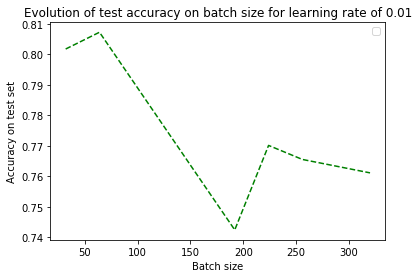

No handles with labels found to put in legend.


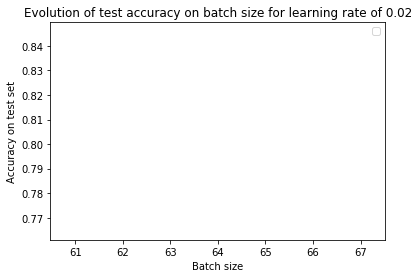

No handles with labels found to put in legend.


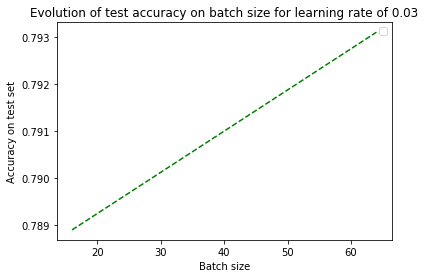

No handles with labels found to put in legend.


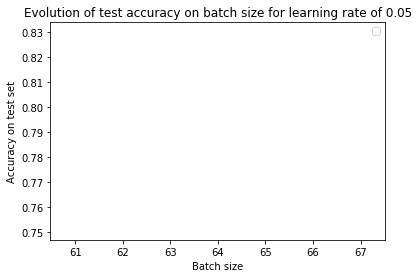

No handles with labels found to put in legend.


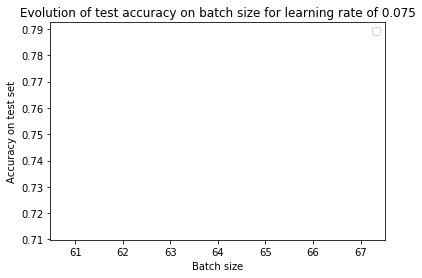

No handles with labels found to put in legend.


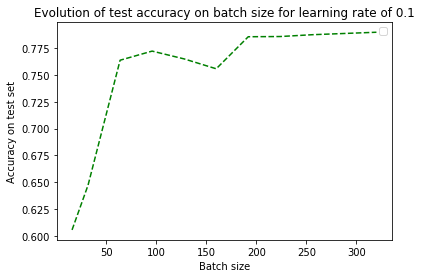

No handles with labels found to put in legend.


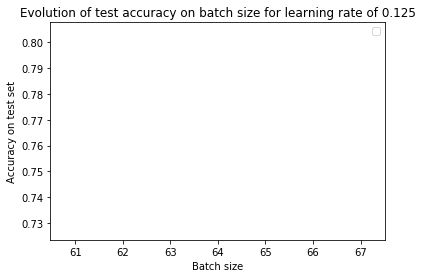

No handles with labels found to put in legend.


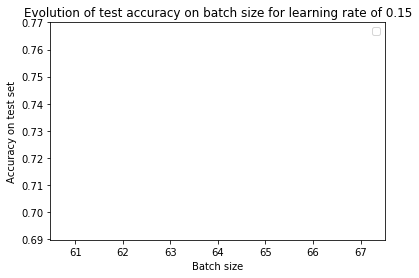

No handles with labels found to put in legend.


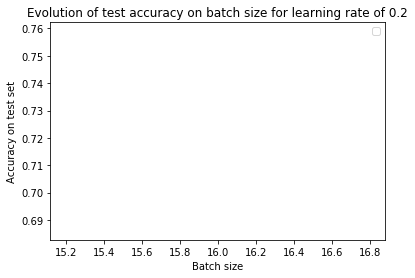

In [131]:
# Plot test set accuracy w.r.t. batch size 
plot_acc_vs_bs(resnet50_cifar10, "ResNet50CIFAR10")

No handles with labels found to put in legend.


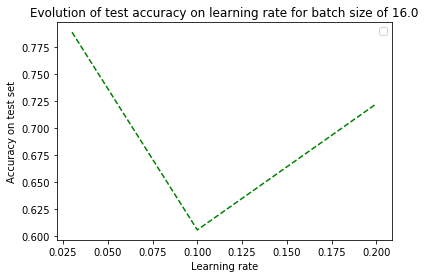

No handles with labels found to put in legend.


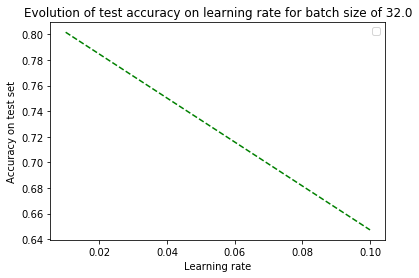

No handles with labels found to put in legend.


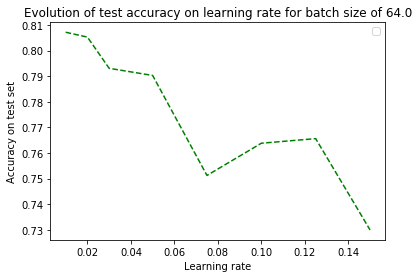

No handles with labels found to put in legend.


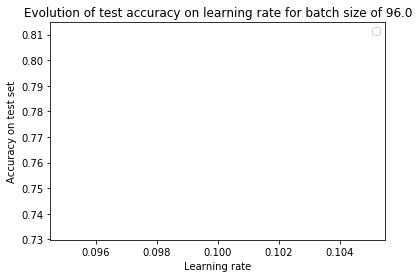

No handles with labels found to put in legend.


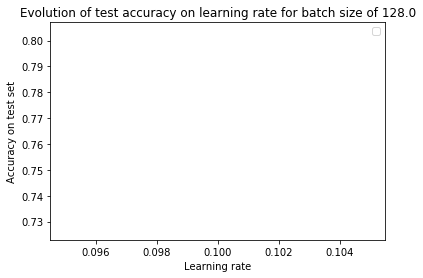

No handles with labels found to put in legend.


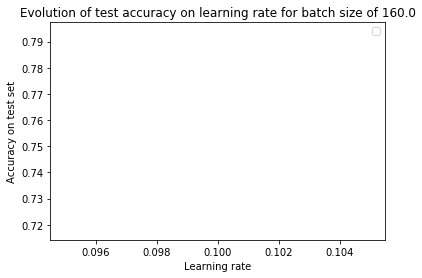

No handles with labels found to put in legend.


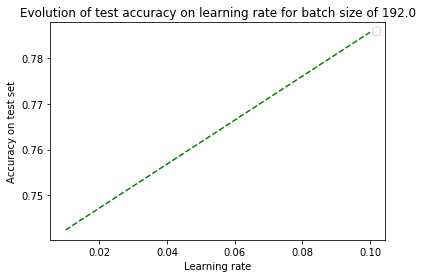

No handles with labels found to put in legend.


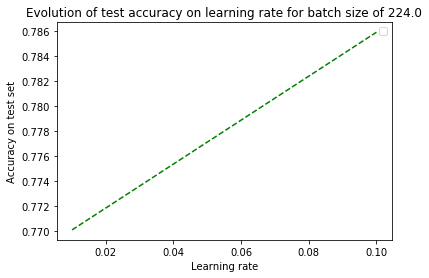

No handles with labels found to put in legend.


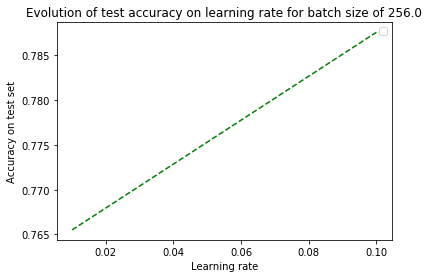

No handles with labels found to put in legend.


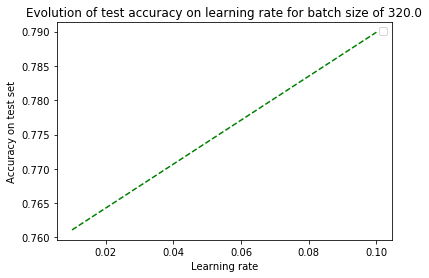

In [132]:
# Plot test set accuracy w.r.t. learning rate
plot_acc_vs_lr(resnet50_cifar10, "ResNet50CIFAR10")

No handles with labels found to put in legend.


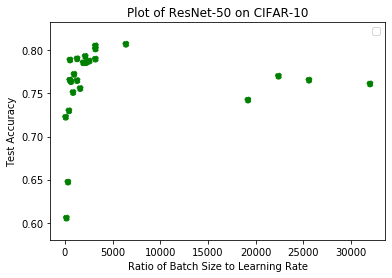

In [134]:
# Plot ratio for each dataset
scatter_plot(resnet50_cifar10, "ResNet50CIFAR10", "Plot of ResNet-50 on CIFAR-10")

#Investigate ResNet50 on CIFAR100

In [138]:
# Investigate ResNet50 on CIFAR100
resnet50_cifar100

,batch_size,learning_rate,val_acc
13,32.0,0.010,0.5208
0,64.0,0.010,0.5138
12,96.0,0.010,0.5058
9,128.0,0.010,0.4991
11,128.0,0.010,0.4945
19,128.0,0.010,0.4956
10,160.0,0.010,0.4863
17,192.0,0.010,0.4803
14,224.0,0.010,0.4634
15,256.0,0.010,0.4467


No handles with labels found to put in legend.


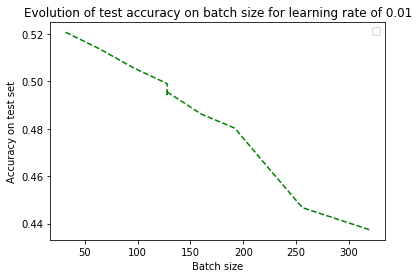

No handles with labels found to put in legend.


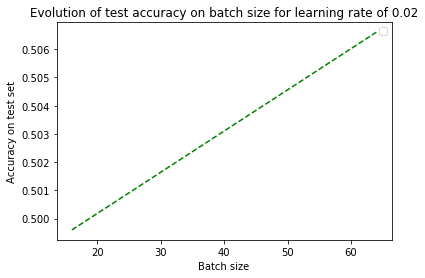

No handles with labels found to put in legend.


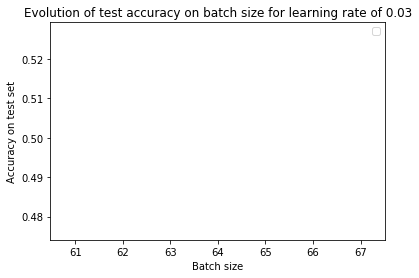

No handles with labels found to put in legend.


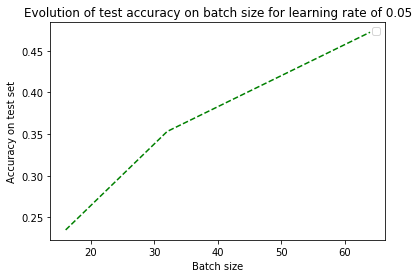

No handles with labels found to put in legend.


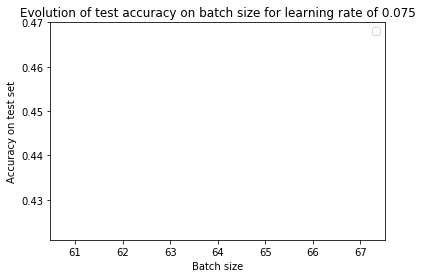

No handles with labels found to put in legend.


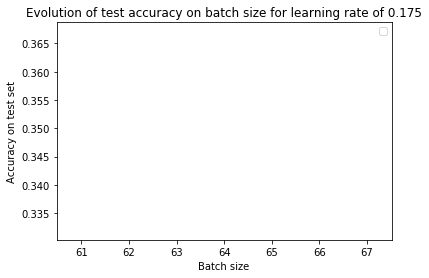

No handles with labels found to put in legend.


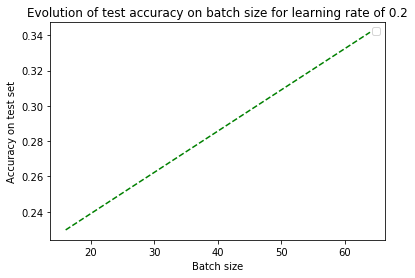

In [135]:
# Plot test set accuracy w.r.t. batch size 
plot_acc_vs_bs(resnet50_cifar100, "ResNet50CIFAR100")

No handles with labels found to put in legend.


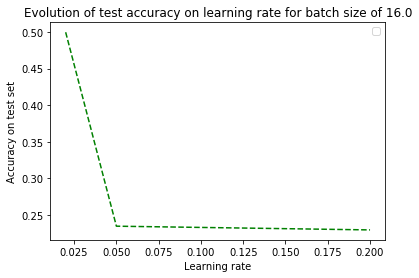

No handles with labels found to put in legend.


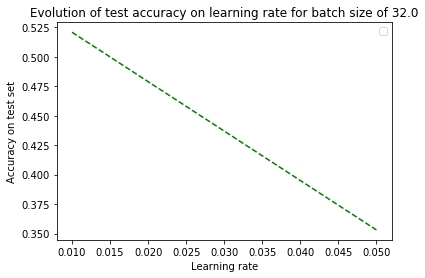

No handles with labels found to put in legend.


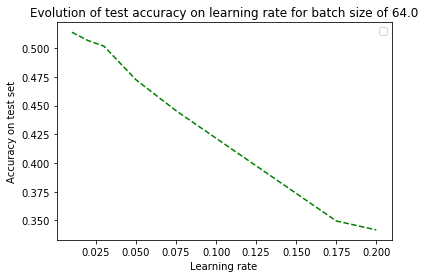

No handles with labels found to put in legend.


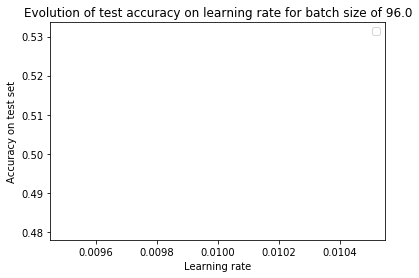

No handles with labels found to put in legend.


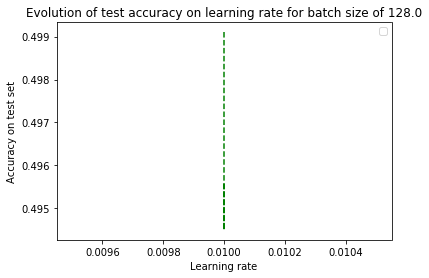

No handles with labels found to put in legend.


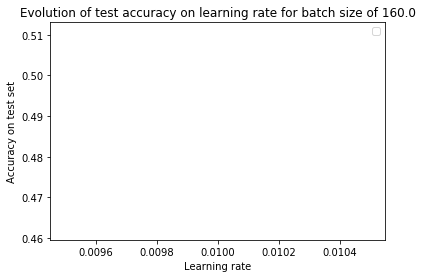

No handles with labels found to put in legend.


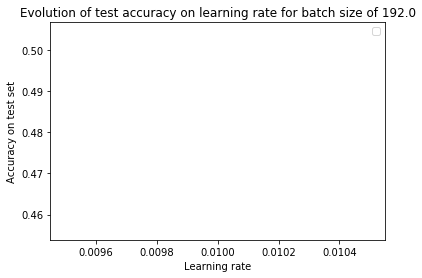

No handles with labels found to put in legend.


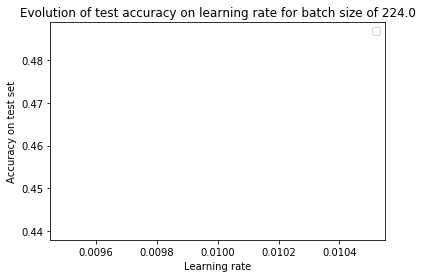

No handles with labels found to put in legend.


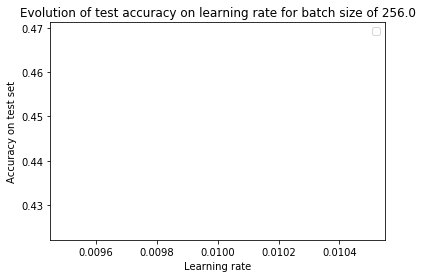

No handles with labels found to put in legend.


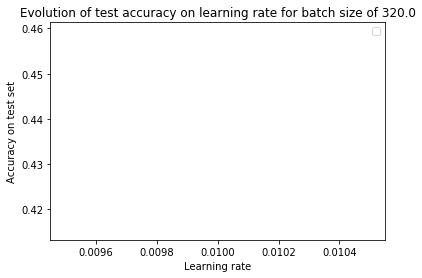

In [136]:
# Plot test set accuracy w.r.t. learning rate
plot_acc_vs_lr(resnet50_cifar100, "ResNet50CIFAR100")

No handles with labels found to put in legend.


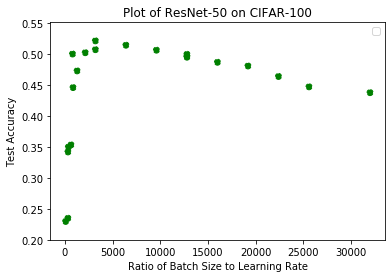

In [137]:
scatter_plot(resnet50_cifar100, "ResNet50CIFAR100", "Plot of ResNet-50 on CIFAR-100")

#Investigate VGG19 on CIFAR10

In [41]:
# Investigate vgg19 on CIFAR10
vgg19_cifar10_epochs200.reset_index(drop=True,inplace=True)
print(vgg19_cifar10_epochs200)

    batch_size  learning_rate  val_acc
0         16.0          0.010   0.9006
1         32.0          0.010   0.8941
2         64.0          0.010   0.8827
3         96.0          0.010   0.8748
4        128.0          0.010   0.8648
5        160.0          0.010   0.8606
6        192.0          0.010   0.8528
7        224.0          0.010   0.8438
8        256.0          0.010   0.8405
9        320.0          0.010   0.8434
10        64.0          0.020   0.8907
11        64.0          0.030   0.8983
12        64.0          0.050   0.9012
13        64.0          0.075   0.9015
14        64.0          0.100   0.9025
15       256.0          0.100   0.8878
16       320.0          0.100   0.8825
17        32.0          0.125   0.8779
18        64.0          0.125   0.9024
19        96.0          0.125   0.8975
20       128.0          0.125   0.8981
21       160.0          0.125   0.8946
22       192.0          0.125   0.8944
23       224.0          0.125   0.8905
24        64.0          0

No handles with labels found to put in legend.


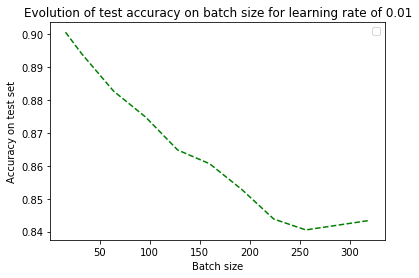

No handles with labels found to put in legend.


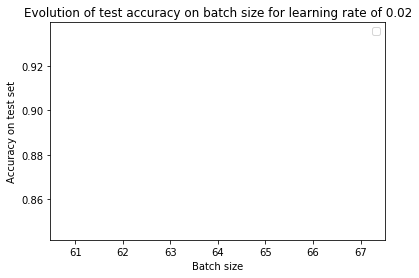

No handles with labels found to put in legend.


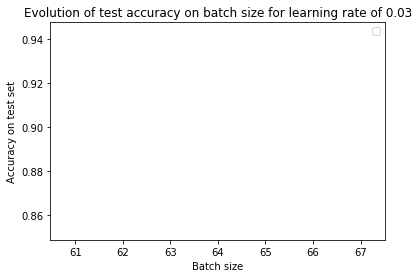

No handles with labels found to put in legend.


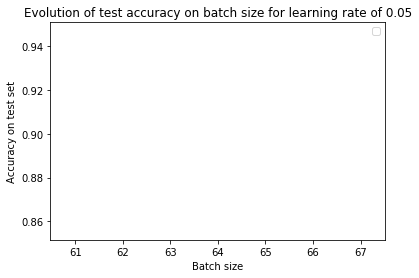

No handles with labels found to put in legend.


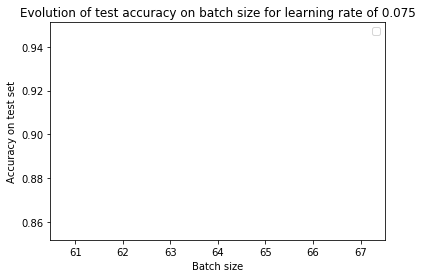

No handles with labels found to put in legend.


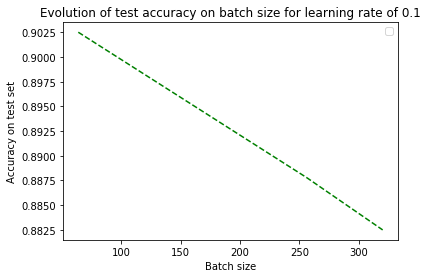

No handles with labels found to put in legend.


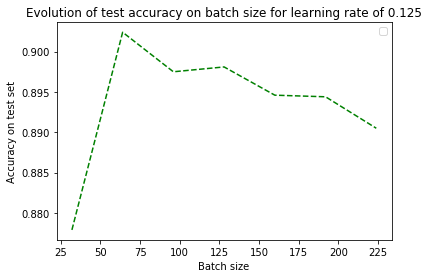

No handles with labels found to put in legend.


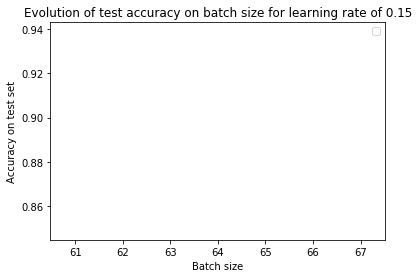

No handles with labels found to put in legend.


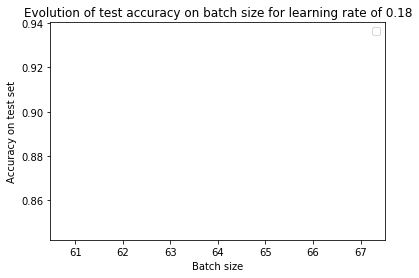

No handles with labels found to put in legend.


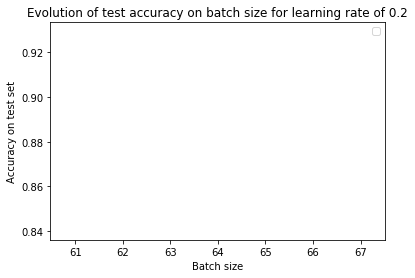

In [42]:
# Plot test set accuracy w.r.t. batch size 
plot_acc_vs_bs(vgg19_cifar10_epochs200, "VGG19CIFAR10")

No handles with labels found to put in legend.


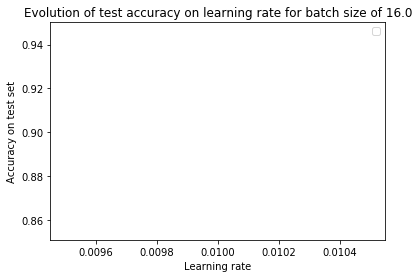

No handles with labels found to put in legend.


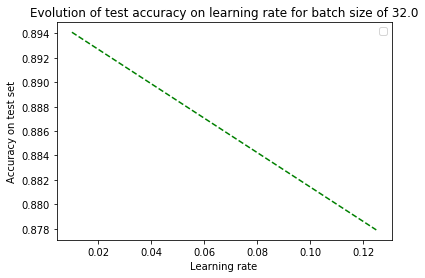

No handles with labels found to put in legend.


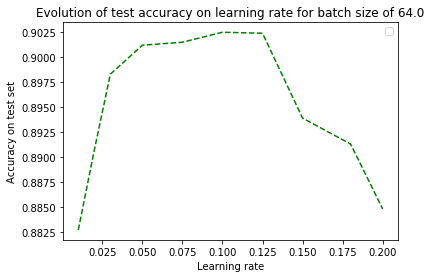

No handles with labels found to put in legend.


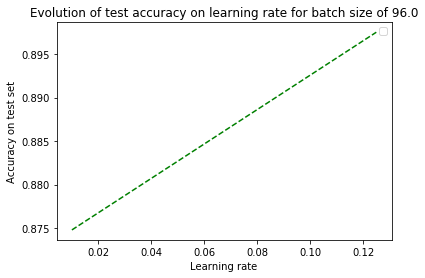

No handles with labels found to put in legend.


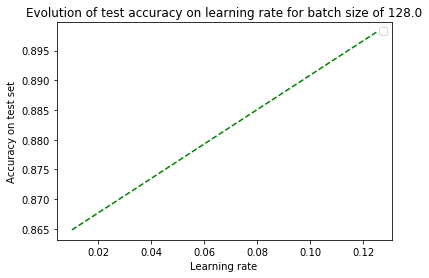

No handles with labels found to put in legend.


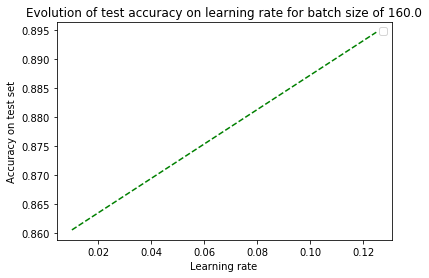

No handles with labels found to put in legend.


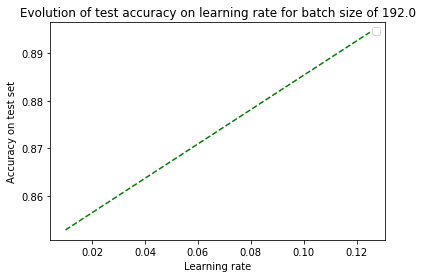

No handles with labels found to put in legend.


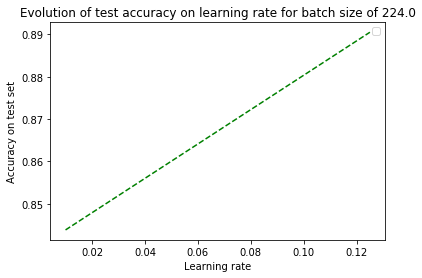

No handles with labels found to put in legend.


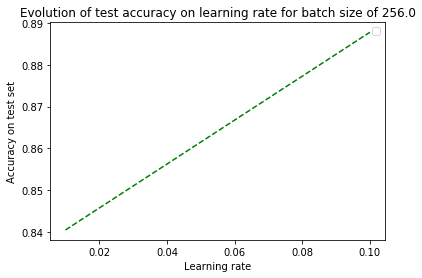

No handles with labels found to put in legend.


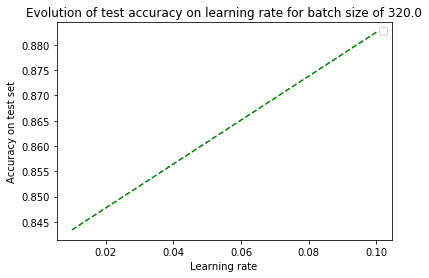

In [43]:
# Plot test set accuracy w.r.t. learning rate
plot_acc_vs_lr(vgg19_cifar10_epochs200, "VGG19CIFAR10")

No handles with labels found to put in legend.


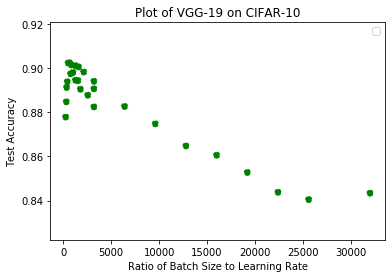

In [44]:
scatter_plot(vgg19_cifar10_epochs200, "VGG19CIFAR10", "Plot of VGG-19 on CIFAR-10")

#Investigate VGG19 on CIFAR100

In [36]:
# Investigate vgg19 on CIFAR100
vgg19_cifar100_epochs200.reset_index(drop=True,inplace=True)
print(vgg19_cifar100_epochs200)

    batch_size  learning_rate  val_acc
0         64.0          0.010   0.4197
1         64.0          0.020   0.4669
2         64.0          0.030   0.5008
3         64.0          0.050   0.5193
4         64.0          0.075   0.5324
5         64.0          0.100   0.5436
6        160.0          0.100   0.4800
7        192.0          0.100   0.4482
8        224.0          0.100   0.4531
9        256.0          0.100   0.4509
10       320.0          0.100   0.4019
11        32.0          0.125   0.4020
12        64.0          0.125   0.5137
13        64.0          0.125   0.5122
14        96.0          0.125   0.5225
15       160.0          0.125   0.4900
16        64.0          0.150   0.5058
17        64.0          0.175   0.4714
18        64.0          0.200   0.4381


No handles with labels found to put in legend.


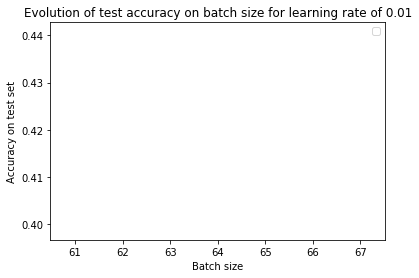

No handles with labels found to put in legend.


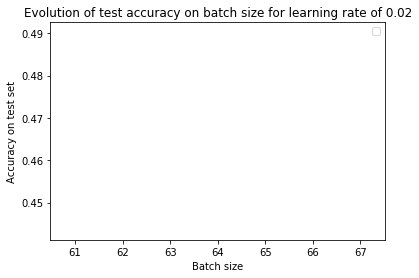

No handles with labels found to put in legend.


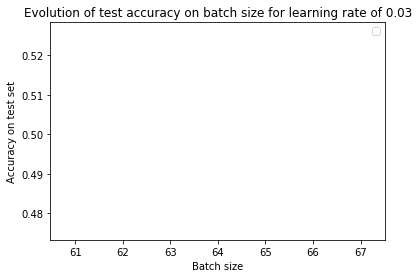

No handles with labels found to put in legend.


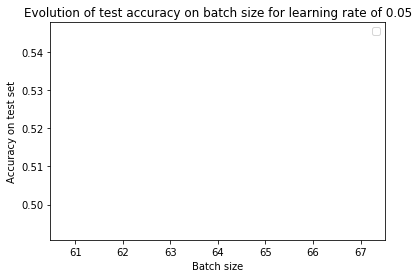

No handles with labels found to put in legend.


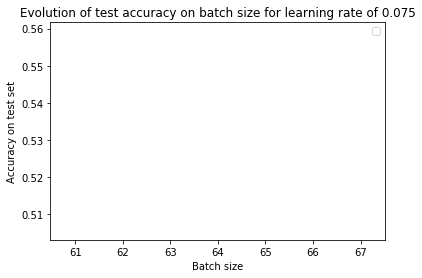

No handles with labels found to put in legend.


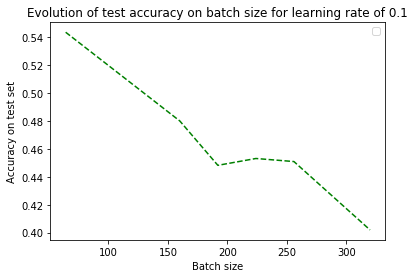

No handles with labels found to put in legend.


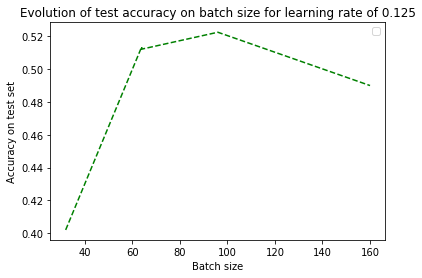

No handles with labels found to put in legend.


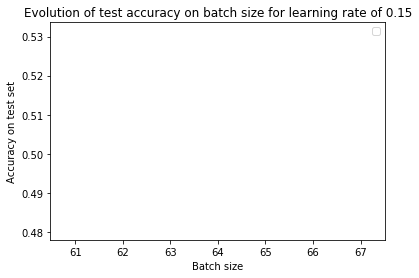

No handles with labels found to put in legend.


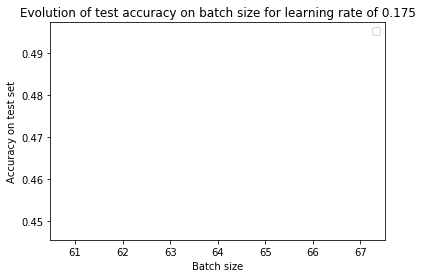

No handles with labels found to put in legend.


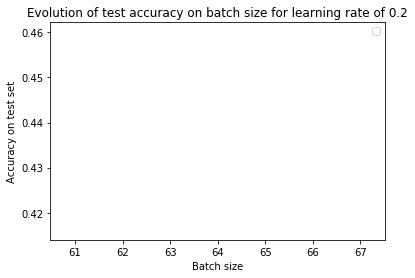

In [37]:
# Plot test set accuracy w.r.t. batch size 
plot_acc_vs_bs(vgg19_cifar100_epochs200, "VGG19CIFAR100")

No handles with labels found to put in legend.


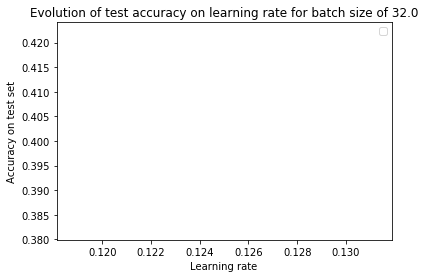

No handles with labels found to put in legend.


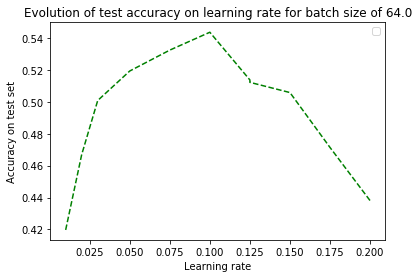

No handles with labels found to put in legend.


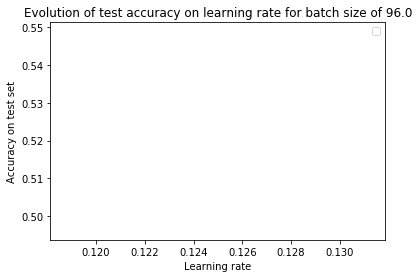

No handles with labels found to put in legend.


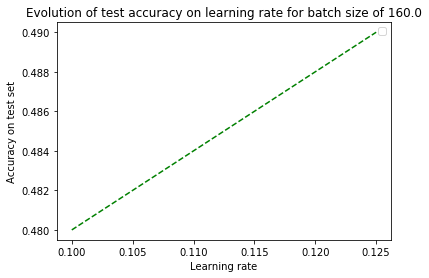

No handles with labels found to put in legend.


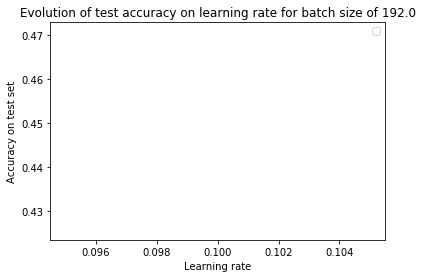

No handles with labels found to put in legend.


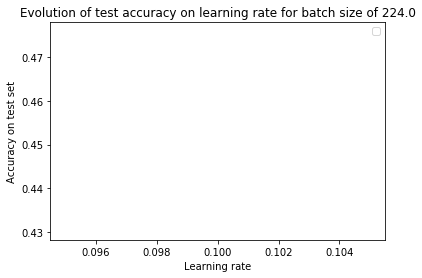

No handles with labels found to put in legend.


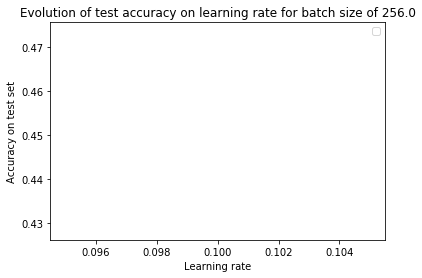

No handles with labels found to put in legend.


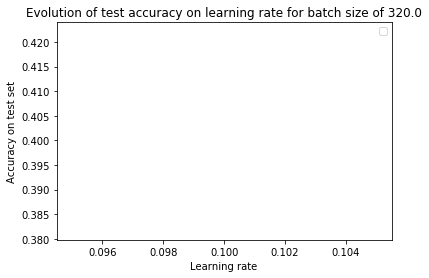

In [38]:
# Plot test set accuracy w.r.t. learning rate
plot_acc_vs_lr(vgg19_cifar100_epochs200, "VGG19CIFAR100")

No handles with labels found to put in legend.


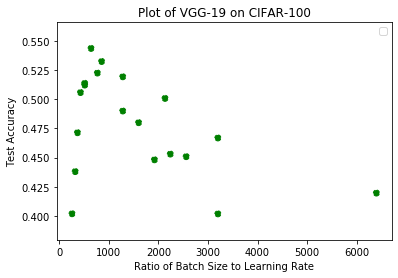

In [39]:
scatter_plot(vgg19_cifar100_epochs200, "VGG19CIFAR100", "Plot of VGG-19 on CIFAR-100")